In [9]:

# imports
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import minmax_scale
import seaborn as sns

%matplotlib inline
plt.style.use('dark_background')

%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
root_folder = Path.cwd().parent.parent
data_folder = Path(root_folder).joinpath('data', 'external')

In [13]:
x_mat, _,  y_mat = get_dataset(root_folder)

  0%|          | 0/405 [00:00<?, ?it/s]/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
100%|██████████| 405/405 [00:12<00:00, 32.80it/s]


In [14]:
x_scaled = np.array([minmax_scale(xx, feature_range=(-1,1)) for xx in x_mat])

/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/sklearn/preprocessin

In [16]:
df_x, df_y = get_dataset_df(root_folder)

In [17]:
x_regr = x_scaled.copy()

In [18]:
print(x_regr.shape)

x_regr = np.swapaxes(x_regr, 1,2)
x_regr = x_regr.reshape(405, 36*12)

x_regr.shape

(405, 36, 12)


(405, 432)

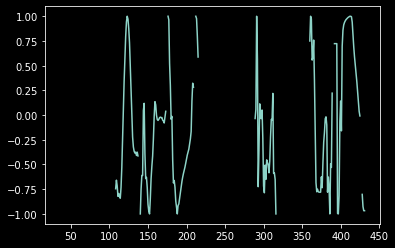

In [19]:
plt.plot(x_regr[0])

In [20]:
df_y.drop('variable', axis=1, inplace=True)

In [28]:
df_y.reset_index(inplace=True)
df_y['adm2_name_code'] = df_y['adm2_name_code'].astype(int)
df_y['season'] = df_y['season'].astype(int)


df_y.set_index(['season', 'adm2_name_code'], inplace=True)

In [32]:
df_y

value
season adm2_name_code          
2013   0               1.439991
       1               1.399998
       2               1.309990
       3               2.210003
       4               1.320012
...                         ...
2019   1               1.190002
       44              1.360000
       15              1.120000
       35              1.280000
       31              1.154998

[297 rows x 1 columns]

In [35]:
gt = np.empty((405,1), dtype=np.float64)
i = 0
for z in y_mat:
    try:
        # gt[i] = df_y[(df_y['season'] == int(z[0,0])) & (df_y['adm2_name_code'] == int(z[0,1])) ]['value'].values
        val = df_y.xs((int(z[0]),int(z[1]))).values[0]
        gt[i] = val

    except KeyError:
        continue
    i += 1

In [36]:
x_regr = np.nan_to_num(x_regr, nan=0)

In [37]:
gt = gt.ravel()

In [40]:
import statsmodels.api as sm


In [44]:

mod = sm.RLM(gt, x_regr)
res = mod.fit()
print(res.summary())

/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/statsmodels/robust/robust_linear_model.py:450: RuntimeWarning: overflow encountered in double_scalars
  ((1 / self.nobs * s_psi_deriv) ** 2) *\
/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/statsmodels/robust/robust_linear_model.py:451: RuntimeWarning: invalid value encountered in multiply
  model.normalized_cov_params


                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                  405
Model:                            RLM   Df Residuals:                      110
Method:                          IRLS   Df Model:                          294
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 23 Jan 2021                                         
Time:                        16:34:19                                         
No. Iterations:                     2                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
x1         -2.624e+275        inf         -0      

In [45]:
mod = sm.OLS(gt, x_regr)
res = mod.fit()
print(res.summary())

/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/scipy/stats/stats.py:1086: RuntimeWarning: overflow encountered in square
  s = a_zero_mean**2
/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/scipy/stats/stats.py:1090: RuntimeWarning: overflow encountered in square
  s = s**2
/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1703: RuntimeWarning: invalid value encountered in double_scalars
  return self.uncentered_tss - self.ssr
/home/cajanond/anaconda3/envs/omdena_base/lib/pyt

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                     nan
Model:                            OLS   Adj. R-squared (uncentered):                nan
Method:                 Least Squares   F-statistic:                                nan
Date:                Sat, 23 Jan 2021   Prob (F-statistic):                         nan
Time:                        16:34:21   Log-Likelihood:                            -inf
No. Observations:                 405   AIC:                                        inf
Df Residuals:                     110   BIC:                                        inf
Df Model:                         295                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [46]:

np.save(Path(data_folder).joinpath('x_scaled.npy'), x_scaled)
np.save(Path(data_folder).joinpath('gt.npy'), gt)

In [47]:
Path(data_folder).joinpath('x_scaled.npy')


PosixPath('/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/x_scaled.npy')